In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

interval_one = pd.read_csv('accidents_2005_to_2007.csv')
interval_two = pd.read_csv('accidents_2009_to_2011.csv')
interval_three = pd.read_csv('accidents_2012_to_2014.csv')

interval_join = pd.concat([interval_one, interval_two, interval_three], axis=0)
df = interval_join.copy()

C:\Users\husey\AppData\Local\Temp\ipykernel_19820\249067347.py:6: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interval_one = pd.read_csv('accidents_2005_to_2007.csv')
C:\Users\husey\AppData\Local\Temp\ipykernel_19820\249067347.py:8: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interval_three = pd.read_csv('accidents_2012_to_2014.csv')


#### İlk olarak üç adet veri dosyamızı tanımladık ve ardından bu dosyaları birleştirme işlemi gerçekleştirdik. Bu veri setlerinin iç yapısı temelde aynı veriyi koruyor zaten. Sadece yıla oranla değişim oranları gösterilmiş. [Veri setinin linki]( https://www.kaggle.com/daveianhickey/2000-16-traffic-flow-england-scotland-wales)

#### Şimdi temel yapıları bu veri seti üzerinden gözlemleyelim..

In [12]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [13]:
print(f" Veri setinin boyut sayısı: {df.ndim}\n",
     f"Veri setinin boyut bilgisi: {df.shape}\n",
     f"Veri setindeki toplam eleman sayısı: {df.size}\n")

 Veri setinin boyut sayısı: 2
 Veri setinin boyut bilgisi: (1504150, 33)
 Veri setindeki toplam eleman sayısı: 49636950



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,1504049.0,439621.405078,95116.160326,64950.000000,375060.000000,439960.000000,523060.000000,6.553700e+05
Location_Northing_OSGR,1504049.0,300158.403995,161008.382735,10290.000000,178260.000000,268830.000000,398151.000000,1.208800e+06
Longitude,1504049.0,-1.436625,1.398078,-7.516225,-2.373902,-1.403714,-0.221510,1.759398e+00
Latitude,1504049.0,52.589399,1.449889,49.912941,51.490156,52.309126,53.478581,6.075754e+01
Police_Force,1504150.0,30.205364,25.516033,1.000000,6.000000,30.000000,45.000000,9.800000e+01
Accident_Severity,1504150.0,2.838190,0.401842,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,1504150.0,1.831606,0.714759,1.000000,1.000000,2.000000,2.000000,6.700000e+01
Number_of_Casualties,1504150.0,1.350960,0.825335,1.000000,1.000000,1.000000,1.000000,9.300000e+01
Day_of_Week,1504150.0,4.118607,1.924405,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),1504150.0,347.614855,259.429163,1.000000,110.000000,322.000000,518.000000,9.410000e+02


#### Şu ana kadar veri tabanı hakkında çeşitli bilgilere eriştik. Birleştirme işlemi yüzünden veri tabanının boyutunun yine çok büyük olduğunu gözlemliyoruz. Bunun dışında göz ucuyla saptadığımız eksik değerler mevcut. Onları daha net inceleyip üstesinden geleceğiz. Betimsel istatik yapısını incelediğimizdeyse 'max' değerlerin çok uçuk olduğu ortaya çıkıyor. Tam olarak bir denge söz konusu değil, büyük ihtimalle aykırı değerler söz konusu. Bu değerlere de bir el atıp ana başlıklar üzerinden bazı sorulara cevap aramaya çalışacağız..

In [16]:
df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

#### Önemli gördüğüm eksik değerler baş ağrıtacak durumda değil dolayısıyla ellemeyeceğim. Şimdi değişkenlere baktığımız zaman gözlem noktası olarak alacağımız ve yoğunlaşacağımız yapıları kontrol edebiliriz. Trafik akışı, önlemler, kazayı tetikleyecek unsurları ele alalım

In [31]:
df.select_dtypes(include=['int64']).head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,1,2,1,1,3,12,3,3218,30,-1,0,1,2005
1,1,3,1,1,4,12,4,450,30,5,0,1,2005
2,1,3,2,1,5,12,5,0,30,-1,0,1,2005
3,1,3,1,1,6,12,3,3220,30,-1,0,1,2005
4,1,3,1,1,2,12,6,0,30,-1,0,1,2005


In [32]:
df.select_dtypes(include=['float64']).head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Junction_Detail
0,525680.0,178240.0,-0.191170,51.489096,NaN
1,524170.0,181650.0,-0.211708,51.520075,NaN
2,524520.0,182240.0,-0.206458,51.525301,NaN
3,526900.0,177530.0,-0.173862,51.482442,NaN
4,528060.0,179040.0,-0.156618,51.495752,NaN


In [33]:
df.select_dtypes(include=['object']).head()

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,04/01/2005,17:42,E09000020,Single carriageway,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Yes,E01002849
1,200501BS00002,05/01/2005,17:36,E09000020,Dual carriageway,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes,E01002909
2,200501BS00003,06/01/2005,00:15,E09000020,Single carriageway,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes,E01002857
3,200501BS00004,07/01/2005,10:35,E09000020,Single carriageway,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,E01002840
4,200501BS00005,10/01/2005,21:13,E09000020,Single carriageway,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,Yes,E01002863


In [44]:
df_num = df.select_dtypes(include=["int64"]) # Bu değişkene sadece sayısal verileri attım
df_num.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
0,1,2,1,1,3,12,3,3218,30,-1,0,1,2005
1,1,3,1,1,4,12,4,450,30,5,0,1,2005
2,1,3,2,1,5,12,5,0,30,-1,0,1,2005
3,1,3,1,1,6,12,3,3220,30,-1,0,1,2005
4,1,3,1,1,2,12,6,0,30,-1,0,1,2005


In [45]:
df_cat = df.select_dtypes(include=["object"]) # Burayada sadece object veri tipine sahip verileri attım
df_cat.head()

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,04/01/2005,17:42,E09000020,Single carriageway,NaN,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,Yes,E01002849
1,200501BS00002,05/01/2005,17:36,E09000020,Dual carriageway,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes,E01002909
2,200501BS00003,06/01/2005,00:15,E09000020,Single carriageway,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,Yes,E01002857
3,200501BS00004,07/01/2005,10:35,E09000020,Single carriageway,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,E01002840
4,200501BS00005,10/01/2005,21:13,E09000020,Single carriageway,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,Yes,E01002863


In [54]:
df_new = pd.concat([df_num, df_cat], axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008300 entries, 0 to 464696
Data columns (total 28 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Police_Force                                 float64
 1   Accident_Severity                            float64
 2   Number_of_Vehicles                           float64
 3   Number_of_Casualties                         float64
 4   Day_of_Week                                  float64
 5   Local_Authority_(District)                   float64
 6   1st_Road_Class                               float64
 7   1st_Road_Number                              float64
 8   Speed_limit                                  float64
 9   2nd_Road_Class                               float64
 10  2nd_Road_Number                              float64
 11  Urban_or_Rural_Area                          float64
 12  Year                                         float64
 13  Accident_Inde

#### Verileri daha iyi incelemek için her veri tipine özel sorgu oluşturma gereği oluştu. Şöyle baktığımızda işimiz daha çok int ve object veri tipler ile alakalı olduğunu düşündüğüm içim sadece bu iki veri tipine ait verileri çektim.

In [24]:
df.pivot_table("Accident_Severity", index="Year", columns="Road_Type")

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,Unknown
Year,,,,,,
2005,2.845220,2.875110,2.913026,2.836789,2.892167,2.888079
2006,2.839516,2.857599,2.915147,2.828125,2.897295,2.875405
2007,2.843832,2.863624,2.912891,2.826373,2.894630,2.883439
2009,2.848162,2.864873,2.904719,2.831007,2.916372,2.881393
2010,2.847056,2.867111,2.910644,2.837448,2.894167,2.876420
2011,2.844696,2.866514,2.901084,2.828720,2.895078,2.887517
2012,2.851204,2.847423,2.901304,2.818029,2.890977,2.901471
2013,2.847704,2.856778,2.894843,2.826201,2.885453,2.867886
2014,2.843923,2.847359,2.895053,2.827947,2.891699,2.832016


In [25]:
df.pivot_table("Accident_Severity", index="Year", columns="Speed_limit")

Speed_limit,10,15,20,30,40,50,60,70
Year,,,,,,,,
2005,2.40,NaN,2.858025,2.870848,2.847443,2.821145,2.761748,2.829412
2006,NaN,3.0,2.814703,2.863561,2.832323,2.823037,2.750125,2.836963
2007,2.75,3.0,2.866492,2.859955,2.841068,2.811027,2.755974,2.833462
2009,3.00,3.0,2.856764,2.864683,2.841379,2.807476,2.749626,2.835103
2010,2.00,3.0,2.860465,2.868753,2.843777,2.821298,2.757082,2.830297
2011,NaN,NaN,2.848579,2.861079,2.830544,2.801133,2.748687,2.830885
2012,3.00,NaN,2.841238,2.846992,2.826313,2.816680,2.743039,2.845004
2013,NaN,NaN,2.837838,2.858917,2.828198,2.797753,2.743022,2.835722
2014,NaN,NaN,2.839672,2.861975,2.824665,2.790926,2.735412,2.829612


In [29]:
df.pivot_table("Number_of_Casualties", index="Year", columns="Day_of_Week")

Day_of_Week,1,2,3,4,5,6,7
Year,,,,,,,
2005,1.470333,1.337372,1.328416,1.321042,1.333412,1.349136,1.441715
2006,1.486965,1.348531,1.323239,1.325174,1.329165,1.350566,1.432217
2007,1.482586,1.337740,1.315817,1.323370,1.321467,1.354521,1.424451
2009,1.460333,1.329880,1.326207,1.328562,1.324830,1.348009,1.423375
2010,1.443551,1.329726,1.311868,1.313972,1.322490,1.352424,1.414697
2011,1.431609,1.333957,1.306008,1.317456,1.316952,1.336340,1.416288
2012,1.445618,1.321112,1.310946,1.315859,1.325349,1.344028,1.394010
2013,1.402720,1.304473,1.291245,1.291677,1.298546,1.324640,1.389693
2014,1.414304,1.307495,1.303432,1.291625,1.305693,1.319407,1.394564


#### Bu üç tablo ile bazı verileri birlikte incelemek istedim.Ancak daha çok yılı baz alarak kaza durumlarını kontrol ettim.

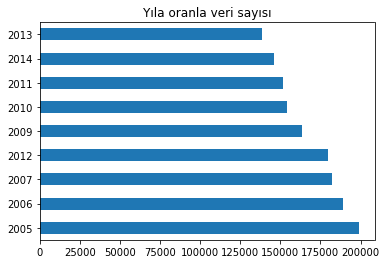

In [52]:
df['Year'].value_counts().plot.barh().set_title("Yıla oranla veri sayısı");

Day_of_Week  Year  
1.0          2005.0    1.470333
             2006.0    1.486965
             2007.0    1.482586
             2009.0    1.460333
             2010.0    1.443551
                         ...   
7.0          2010.0    1.414697
             2011.0    1.416288
             2012.0    1.394010
             2013.0    1.389693
             2014.0    1.394564
Name: Number_of_Casualties, Length: 63, dtype: float64


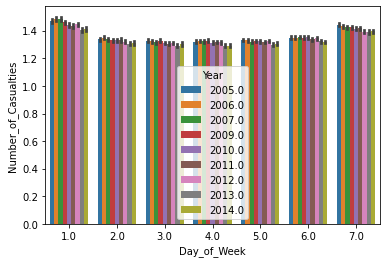

In [64]:
sns.barplot(x='Day_of_Week', y='Number_of_Casualties', hue= "Year", data = df_new);
grrop = df_new.groupby(["Day_of_Week", "Year"])["Number_of_Casualties"].mean()
print(grrop)

#### Bu grafiğimizde yıla oranla haftanın günlerine dağılmış trafik kazası geçirip yaralanan bireylerin sayısını gözlemliyoruz. Her yılın 52 haftası boyunca toplam kaza sonuçlarını elde ederek tahmini veri modelleri oluşturabiliriz. Ek olarak grafiği doğrulayabilmek için bir groupby işlemi ile sayısal değerleri ekrana döktüm.

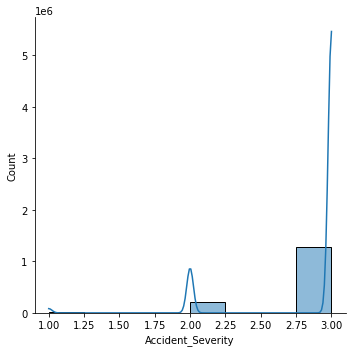

In [75]:
sns.displot(df_new.Accident_Severity, bins = 8, kde = True);

#### Kaza şiddeti verisi üzerinde histogram yoğunluk grafiği oluşturdum. Bu kaza verilerini alıp aralıklara bölerek ilgili değerlerin gözlem ve frekanslarını verecektir. Şimdi kaza şiddetiyle diğer verileri çaprazlayarak daha tutarlı grafik verileri elde edelim.

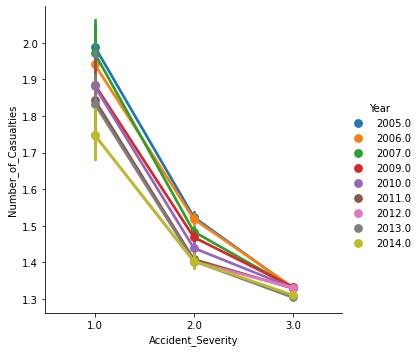

In [80]:
sns.catplot(x = "Accident_Severity", y = "Number_of_Casualties", hue= "Year", kind="point", data=df_new)

In [84]:
df_new["Number_of_Casualties"].value_counts()

1.0     1153856
2.0      241290
3.0       68858
4.0       25045
5.0        9216
6.0        3486
7.0        1161
8.0         511
9.0         246
10.0        134
11.0         88
12.0         47
13.0         42
14.0         27
15.0         16
16.0         15
17.0         15
18.0         11
22.0         11
19.0          9
21.0          8
26.0          7
29.0          6
25.0          4
24.0          4
20.0          4
23.0          4
42.0          3
41.0          2
36.0          2
40.0          2
51.0          2
27.0          2
43.0          2
87.0          2
93.0          1
70.0          1
46.0          1
38.0          1
33.0          1
35.0          1
63.0          1
48.0          1
68.0          1
28.0          1
45.0          1
54.0          1
Name: Number_of_Casualties, dtype: int64

In [85]:
df_new["Accident_Severity"].value_counts()

3.0    1280205
2.0     204504
1.0      19441
Name: Accident_Severity, dtype: int64

In [86]:
df_new["Year"].value_counts()

2005.0    198735
2006.0    189161
2007.0    182115
2012.0    179715
2009.0    163554
2010.0    154414
2011.0    151474
2014.0    146322
2013.0    138660
Name: Year, dtype: int64

In [87]:
df_new["Day_of_Week"].value_counts()

6.0    247137
5.0    226411
4.0    226359
3.0    224110
2.0    213748
7.0    201413
1.0    164972
Name: Day_of_Week, dtype: int64

In [91]:
df_new["Date"].value_counts()

21/10/2005    822
18/11/2005    787
29/09/2006    784
22/09/2006    780
07/12/2005    775
             ... 
25/12/2007    157
02/01/2011    146
25/12/2011    142
10/01/2010    130
25/12/2014    128
Name: Date, Length: 3286, dtype: int64

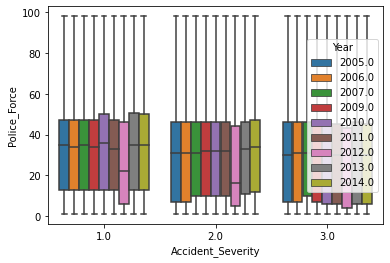

In [100]:
sns.boxplot(x="Accident_Severity", y="Police_Force", hue="Year", data=df_new);

#### İlk başta hızlıca gözlem yapacağım verilerin değer sayısına baktım. Ardından kutu grafiği ile yıla oranla polis kuvvetlerinin sayısal olarak bulunduğu bir ortamdaki kaza şiddetlerini gözlemlemeye çalıştım. Diğer yapılardan da kaza şiddetlerini gözlemleyelim;

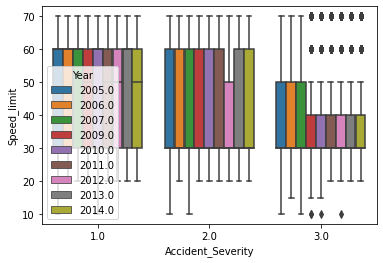

In [101]:
sns.boxplot(x="Accident_Severity", y="Speed_limit", hue="Year", data=df_new); # hız limitlerine oranla kaza şiddeti

C:\Users\husey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


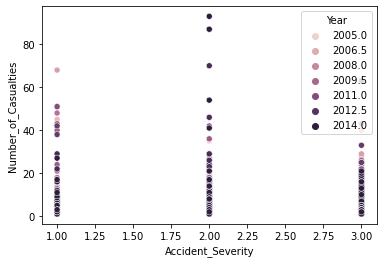

In [105]:
sns.scatterplot(x="Accident_Severity", y="Number_of_Casualties", hue="Year", data = df_new);

#### Burada da korelasyon grafiği oluşturduk. Değişkenler arasındaki ilişkiyi ifade eden bu yapı verilerin birbirleri ile alakasını ölçüyor..

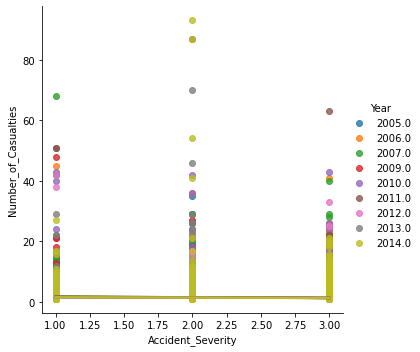

In [106]:
sns.lmplot(x="Accident_Severity", y="Number_of_Casualties", hue="Year", data = df_new);

In [108]:
# pip install researchpy

In [109]:
import researchpy as rp

rp.summary_cont(df_new[["Number_of_Casualties", "Accident_Severity", "Year"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Number_of_Casualties,1504150.0,1.3510,0.8253,0.0007,1.3496,1.3523
1,Accident_Severity,1504150.0,2.8382,0.4018,0.0003,2.8375,2.8388
2,Year,1504150.0,2009.3697,3.0135,0.0025,2009.3649,2009.3745


In [112]:
rp.summary_cont(df_new[["Police_Force", "Speed_limit", "Number_of_Vehicles"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Police_Force,1504150.0,30.2054,25.5160,0.0208,30.1646,30.2461
1,Speed_limit,1504150.0,39.0054,14.1399,0.0115,38.9828,39.0280
2,Number_of_Vehicles,1504150.0,1.8316,0.7148,0.0006,1.8305,1.8327


In [115]:
rp.summary_cat(df_new[["Road_Type", "Pedestrian_Crossing-Human_Control", "Weather_Conditions"]])

,Variable,Outcome,Count,Percent
0,Road_Type,Single carriageway,1126951,74.92
1,,Dual carriageway,221741,14.74
2,,Roundabout,100463,6.68
3,,One way street,30981,2.06
4,,Slip road,15668,1.04
5,,Unknown,8346,0.55
6,Pedestrian_Crossing-Human_Control,None within 50 metres,1495269,99.41
7,,Control by other authorised person,5220,0.35
8,,Control by school crossing patrol,3644,0.24
9,Weather_Conditions,Fine without high winds,1203943,80.05


#### Evet researchpy kütüphanesini kullanarak bildiğimiz betimsel istataistik yapısından sıyrılıp "gözlemler, ortalama değer, standart sapma, standart hata ve güven aralıkları" gibi verilere ulaşabiliyoruz. Daha somut veriler üzerinden gözlem yapma imkanımız oluyor.

In [116]:
df[["Number_of_Casualties", "Accident_Severity"]].cov()

,Number_of_Casualties,Accident_Severity
Number_of_Casualties,0.681177,-0.027708
Accident_Severity,-0.027708,0.161477


In [118]:
df[["Number_of_Casualties", "Accident_Severity"]].corr()

,Number_of_Casualties,Accident_Severity
Number_of_Casualties,1.000000,-0.083544
Accident_Severity,-0.083544,1.000000


#### Bu kovaryans yapısını yani iki değişken arasındaki anlamlılık oranını farklı değişkenlerde ölçeklendirelim.

In [119]:
df[["Speed_limit", "Number_of_Casualties"]].cov()

,Speed_limit,Number_of_Casualties
Speed_limit,199.937570,1.628583
Number_of_Casualties,1.628583,0.681177
